In [6]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

### Lecture des images

In [9]:
BO4= gdal.Open(r'images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff', gdal.GA_ReadOnly) 
BO3= gdal.Open(r'images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B03_(Raw).tiff', gdal.GA_ReadOnly) 
BO2= gdal.Open(r'images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B02_(Raw).tiff', gdal.GA_ReadOnly) 

### Récupération de la première bande

In [10]:
redBand = BO4.GetRasterBand(1)
greenBand = BO3.GetRasterBand(1)
blueBand = BO2.GetRasterBand(1)

### Transformation en tableau numpy

In [12]:
red = redBand.ReadAsArray()
green = greenBand.ReadAsArray()
blue = blueBand.ReadAsArray()

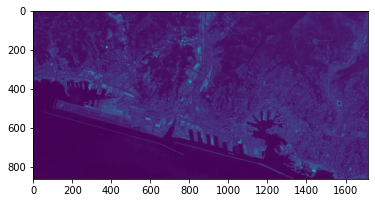

In [13]:
plt.imshow(red)

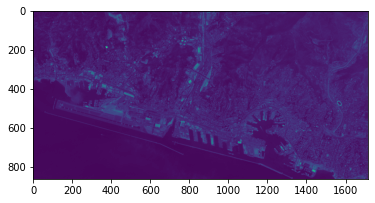

In [14]:
plt.imshow(green)

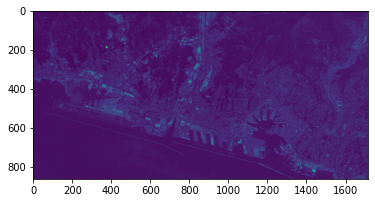

In [15]:
plt.imshow(blue)

### Transformation en image couleur ( tableau 3D )

In [18]:
rgb_composite_raw= np.dstack((red, green, blue))
rgb_composite_raw.shape

(860, 1715, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


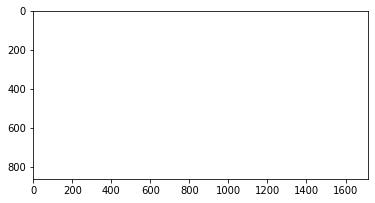

In [19]:
plt.imshow(rgb_composite_raw)

In [20]:
red.max(),red.min()

(65535, 0)

In [21]:
green.max(),green.min()

(65535, 465)

In [22]:
blue.max(),blue.min()

(65535, 0)

### Normalisation 

In [23]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

In [25]:
red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

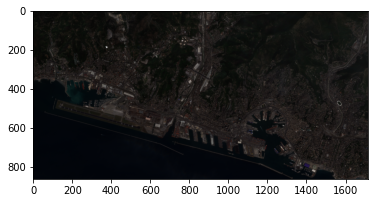

In [26]:
rgb_composite_n= np.dstack((red_n, green_n, blue_n))
plt.imshow(rgb_composite_n)

### Amélioration du contraste

In [27]:
#Décalage

In [60]:
def brighten(band):
    alpha=0.01
    beta=0
    return np.clip(alpha*band+beta,0,255)

In [61]:
red_b=brighten(red)
green_b=brighten(green)
blue_b=brighten(blue)

red_bn = normalize(red_b)
green_bn = normalize(green_b)
blue_bn = normalize(blue_b)

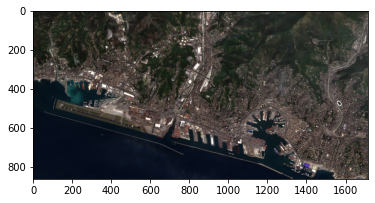

In [62]:
rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

### Correction gamma

In [78]:
def gammacorr(band):
    gamma=1.8
    return np.power(band, 1/gamma)



In [79]:
red_g=gammacorr(red)
green_g=gammacorr(green)
blue_g=gammacorr(blue)

red_gn = normalize(red_g)
green_gn = normalize(green_g)
blue_gn = normalize(blue_g)

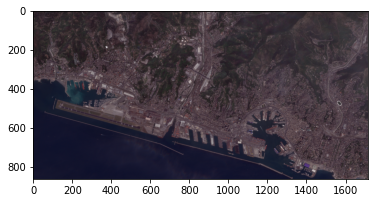

In [80]:
rgb_composite_gn= np.dstack((red_gn, green_gn, blue_gn))
plt.imshow(rgb_composite_gn)

### Sauvegarde des images obtenues 

In [88]:
rgb_plot=plt.imshow(rgb_composite_bn, interpolation='lanczos')
plt.axis('off')
plt.savefig('resultats\img1.png',dpi=200,bbox_inches='tight')
plt.close('all')

In [89]:
rgb_plot=plt.imshow(rgb_composite_gn, interpolation='lanczos')
plt.axis('off')
plt.savefig('resultats\img2.png',dpi=200,bbox_inches='tight')
plt.close('all')